# OLAP Queries and Analysis

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
# Connect to Database
db_path = '../task2_etlprocess/retail_dw.db'
conn = sqlite3.connect(db_path)

print("Connected to database successfully")

Connected to database successfully


### Query 1 - Roll-up (Total Sales by Country and Quarter)

In [3]:
print("Query 1: Roll-up - Total sales by country and quarter\n")

query1 = """
SELECT 
    c.Country,
    t.Year,
    t.Quarter,
    COUNT(s.SalesID) as NumberOfTransactions,
    SUM(s.Quantity) as TotalQuantity,
    ROUND(SUM(s.NetSales), 2) as TotalSales
FROM 
    SalesFact s
    JOIN CustomerDim c ON s.CustomerID = c.CustomerID
    JOIN TimeDim t ON s.TimeID = t.TimeID
GROUP BY 
    c.Country, t.Year, t.Quarter
ORDER BY 
    c.Country, t.Year, t.Quarter;
"""

df_rollup = pd.read_sql_query(query1, conn)

print(f"Total records: {len(df_rollup)}")
print("\nSample results (first 15 rows):")
print(df_rollup.head(15))

print("\nTop 10 countries by total sales:")
top_countries = df_rollup.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(10)
print(top_countries)

Query 1: Roll-up - Total sales by country and quarter

Total records: 116

Sample results (first 15 rows):
      Country  Year  Quarter  NumberOfTransactions  TotalQuantity  TotalSales
0   Australia  2011        1                   361          25042    41577.22
1   Australia  2011        2                   321          25380    40015.14
2   Australia  2011        3                   368          21967    32560.31
3   Australia  2011        4                   172          11695    24725.93
4     Austria  2011        1                    39           1324     2226.48
5     Austria  2011        2                   106           1180     3055.61
6     Austria  2011        3                   143           1363     2708.03
7     Austria  2011        4                   158           1868     3962.28
8     Bahrain  2011        2                    17            260      548.40
9     Belgium  2011        1                   299           3398     6093.15
10    Belgium  2011        2       

### Query 2 - Drill-down (UK Sales by Month)

In [4]:
print("Query 2: Drill-down - Sales details for United Kingdom by month\n")

query2 = """
SELECT 
    t.Year,
    t.Month,
    CASE t.Month
        WHEN 1 THEN 'January'
        WHEN 2 THEN 'February'
        WHEN 3 THEN 'March'
        WHEN 4 THEN 'April'
        WHEN 5 THEN 'May'
        WHEN 6 THEN 'June'
        WHEN 7 THEN 'July'
        WHEN 8 THEN 'August'
        WHEN 9 THEN 'September'
        WHEN 10 THEN 'October'
        WHEN 11 THEN 'November'
        WHEN 12 THEN 'December'
    END as MonthName,
    COUNT(s.SalesID) as NumberOfTransactions,
    SUM(s.Quantity) as TotalQuantity,
    ROUND(SUM(s.NetSales), 2) as TotalSales,
    ROUND(AVG(s.NetSales), 2) as AverageSales
FROM 
    SalesFact s
    JOIN CustomerDim c ON s.CustomerID = c.CustomerID
    JOIN TimeDim t ON s.TimeID = t.TimeID
WHERE 
    c.Country = 'United Kingdom'
GROUP BY 
    t.Year, t.Month
ORDER BY 
    t.Year, t.Month;
"""

df_drilldown = pd.read_sql_query(query2, conn)

print(f"Total records: {len(df_drilldown)}")
print("\nMonthly sales for United Kingdom:")
print(df_drilldown)

Query 2: Drill-down - Sales details for United Kingdom by month

Total records: 12

Monthly sales for United Kingdom:
    Year  Month  MonthName  NumberOfTransactions  TotalQuantity  TotalSales  \
0   2011      1    January                 18158         278251   442190.06   
1   2011      2   February                 17758         213375   355655.63   
2   2011      3      March                 24012         276304   467198.59   
3   2011      4      April                 20865         260448   409559.14   
4   2011      5        May                 25202         301824   551568.82   
5   2011      6       June                 23714         280974   524915.48   
6   2011      7       July                 23598         303601   485612.25   
7   2011      8     August                 23104         310831   498453.32   
8   2011      9  September                 35634         454559   796780.27   
9   2011     10    October                 43733         476984   824766.22   
10  2011     

### Query 3 - Slice (Sales by Product Category)

In [5]:
print("Query 3: Slice - Total sales by product category\n")

query3 = """
SELECT 
    p.ProductCategory,
    COUNT(DISTINCT s.CustomerID) as UniqueCustomers,
    COUNT(s.SalesID) as NumberOfTransactions,
    SUM(s.Quantity) as TotalQuantity,
    ROUND(SUM(s.NetSales), 2) as TotalSales,
    ROUND(AVG(s.NetSales), 2) as AverageSales,
    ROUND(SUM(s.NetSales) * 100.0 / (SELECT SUM(NetSales) FROM SalesFact), 2) as PercentageOfTotalSales
FROM 
    SalesFact s
    JOIN ProductDim p ON s.ProductID = p.ProductID
GROUP BY 
    p.ProductCategory
ORDER BY 
    TotalSales DESC;
"""

df_slice = pd.read_sql_query(query3, conn)

print(f"Total categories: {len(df_slice)}")
print("\nSales by product category:")
print(df_slice)

Query 3: Slice - Total sales by product category

Total categories: 8

Sales by product category:
                  ProductCategory  UniqueCustomers  NumberOfTransactions  \
0   Warm Accessories & Gift Items             4153                288373   
1      Gift Sets & DIY Craft Kits             3437                 62196   
2                Home Metal Decor             2663                 38401   
3    Party & Celebration Supplies             3010                 40667   
4        Candles & Lighting Decor             1591                 21608   
5      Bags & Storage Accessories             1996                 14371   
6            Mugs & Home Messages             1702                 17145   
7  Fashion & Personal Accessories              741                  5863   

   TotalQuantity  TotalSales  AverageSales  PercentageOfTotalSales  
0        3096497  5847483.33         20.28                   59.41  
1         628568  1125228.79         18.09                   11.43  
2         

### Top 10 Countries by Total Sales (Bar Chart)

Saved: images/top_countries_sales.png


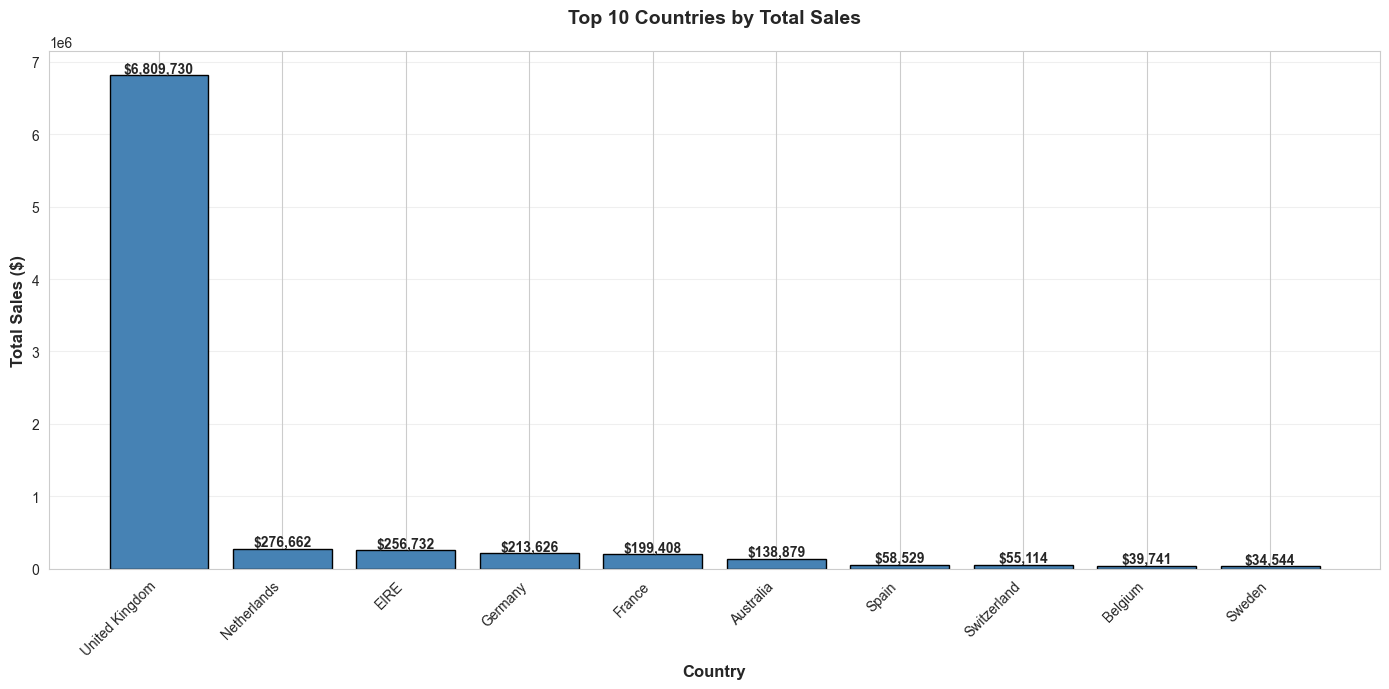

In [7]:
top_10_countries = df_rollup.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 7))
bars = plt.bar(range(len(top_10_countries)), top_10_countries.values, color='steelblue', edgecolor='black')

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel('Country', fontsize=12, fontweight='bold')
plt.ylabel('Total Sales ($)', fontsize=12, fontweight='bold')
plt.title('Top 10 Countries by Total Sales', fontsize=14, fontweight='bold', pad=20)
plt.xticks(range(len(top_10_countries)), top_10_countries.index, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.savefig('images/top_countries_sales.png', dpi=300, bbox_inches='tight')
print("Saved: images/top_countries_sales.png")
plt.show()

### Quarterly Sales Trend for Top 5 Countries

Saved: images/quarterly_sales_trend.png


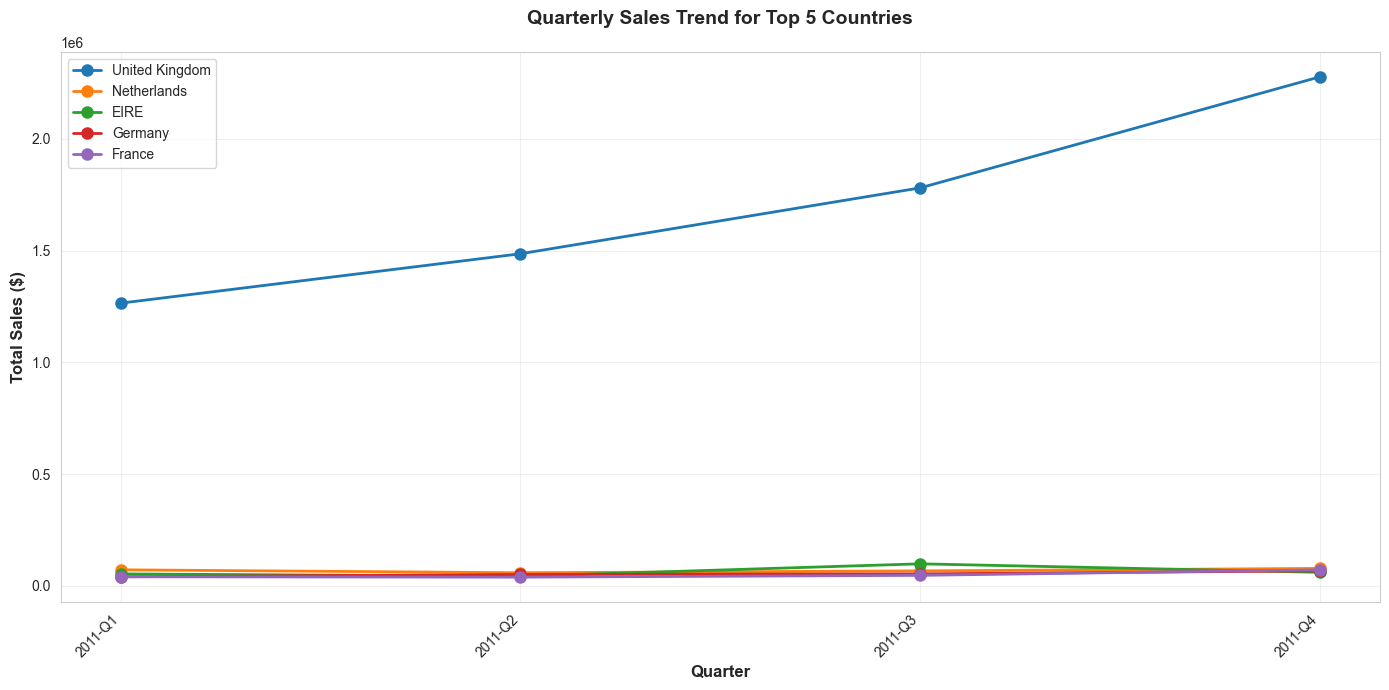

In [8]:
top_5_countries = df_rollup.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(5).index

df_top5 = df_rollup[df_rollup['Country'].isin(top_5_countries)].copy()
df_top5['Quarter_Label'] = df_top5['Year'].astype(str) + '-Q' + df_top5['Quarter'].astype(str)

plt.figure(figsize=(14, 7))

for country in top_5_countries:
    country_data = df_top5[df_top5['Country'] == country]
    plt.plot(country_data['Quarter_Label'], country_data['TotalSales'], 
             marker='o', linewidth=2, label=country, markersize=8)

plt.xlabel('Quarter', fontsize=12, fontweight='bold')
plt.ylabel('Total Sales ($)', fontsize=12, fontweight='bold')
plt.title('Quarterly Sales Trend for Top 5 Countries', fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=10, loc='best')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.savefig('images/quarterly_sales_trend.png', dpi=300, bbox_inches='tight')
print("Saved: images/quarterly_sales_trend.png")
plt.show()

### UK Monthly Sales Trend

Saved: images/uk_monthly_sales.png


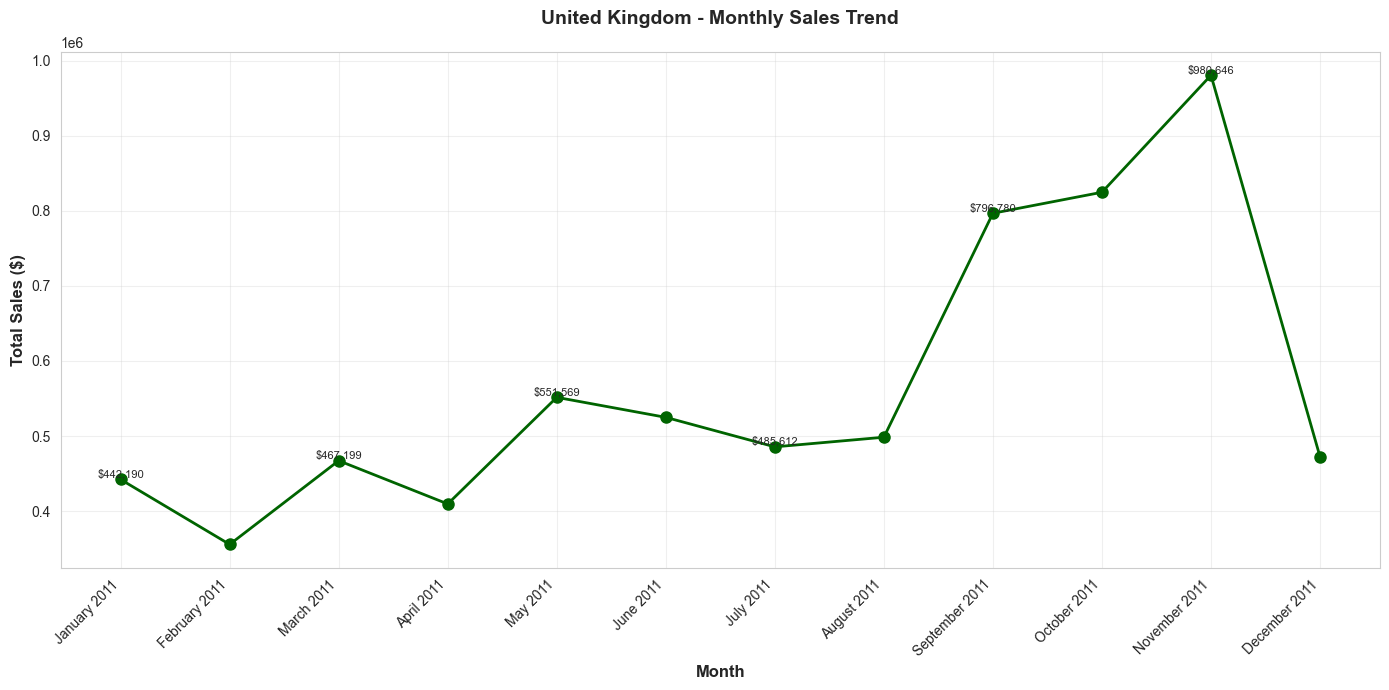

In [9]:
df_drilldown['Month_Year'] = df_drilldown['MonthName'] + ' ' + df_drilldown['Year'].astype(str)

plt.figure(figsize=(14, 7))
plt.plot(range(len(df_drilldown)), df_drilldown['TotalSales'], 
         marker='o', linewidth=2, color='darkgreen', markersize=8)

for i, row in df_drilldown.iterrows():
    if i % 2 == 0:
        plt.text(i, row['TotalSales'], f"${row['TotalSales']:,.0f}",
                ha='center', va='bottom', fontsize=8)

plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Total Sales ($)', fontsize=12, fontweight='bold')
plt.title('United Kingdom - Monthly Sales Trend', fontsize=14, fontweight='bold', pad=20)
plt.xticks(range(len(df_drilldown)), df_drilldown['Month_Year'], rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.savefig('images/uk_monthly_sales.png', dpi=300, bbox_inches='tight')
print("Saved: images/uk_monthly_sales.png")
plt.show()

### Sales by Product Category (Horizontal Bar Chart)

Saved: images/sales_by_category.png


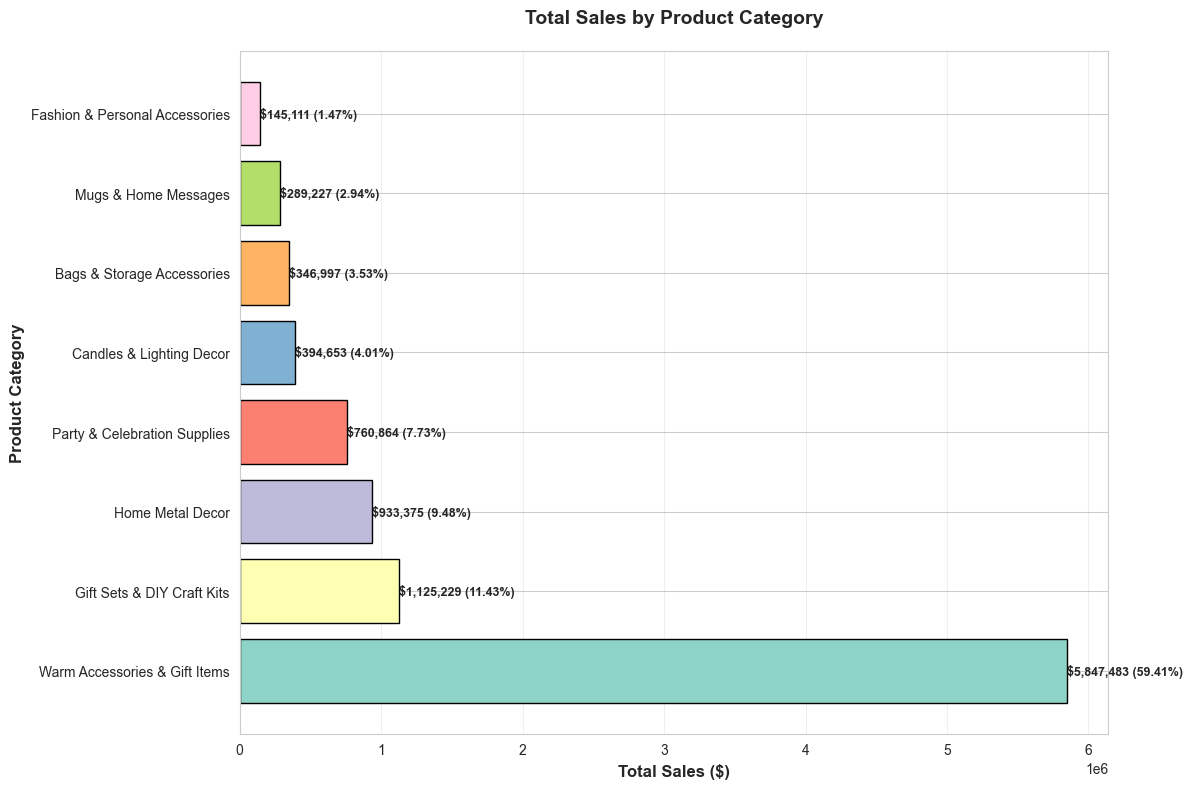

In [10]:
plt.figure(figsize=(12, 8))

colors = plt.cm.Set3(range(len(df_slice)))
bars = plt.barh(df_slice['ProductCategory'], df_slice['TotalSales'], color=colors, edgecolor='black')

for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2.,
             f'${width:,.0f} ({df_slice.iloc[i]["PercentageOfTotalSales"]}%)',
             ha='left', va='center', fontsize=9, fontweight='bold')

plt.xlabel('Total Sales ($)', fontsize=12, fontweight='bold')
plt.ylabel('Product Category', fontsize=12, fontweight='bold')
plt.title('Total Sales by Product Category', fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()

plt.savefig('images/sales_by_category.png', dpi=300, bbox_inches='tight')
print("Saved: images/sales_by_category.png")
plt.show()

### Product Category Market Share (Pie Chart)

Saved: images/category_market_share.png


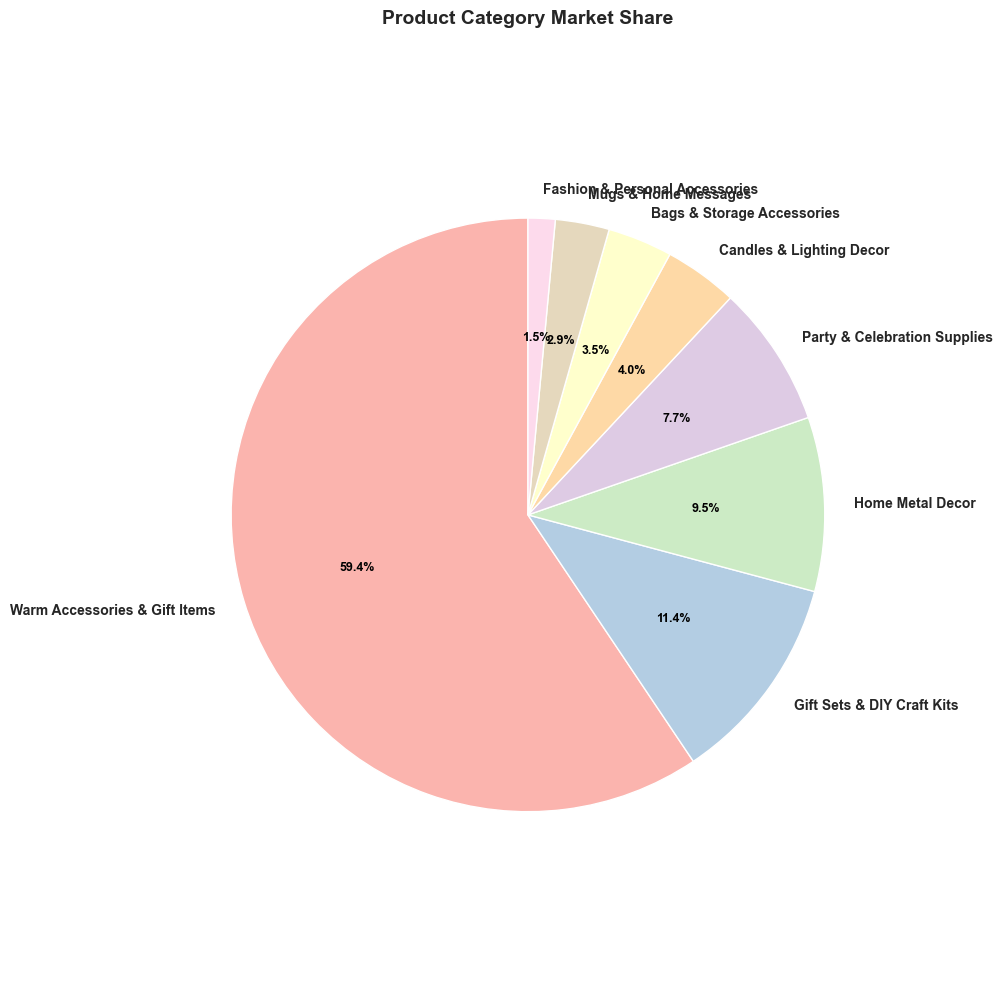

In [11]:
plt.figure(figsize=(10, 10))

colors = plt.cm.Pastel1(range(len(df_slice)))
wedges, texts, autotexts = plt.pie(df_slice['TotalSales'], 
                                     labels=df_slice['ProductCategory'],
                                     autopct='%1.1f%%',
                                     startangle=90,
                                     colors=colors,
                                     textprops={'fontsize': 10, 'fontweight': 'bold'})

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(9)

plt.title('Product Category Market Share', fontsize=14, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()

plt.savefig('images/category_market_share.png', dpi=300, bbox_inches='tight')
print("Saved: images/category_market_share.png")
plt.show()

### Transactions vs Sales by Category

Saved: images/transactions_vs_sales.png


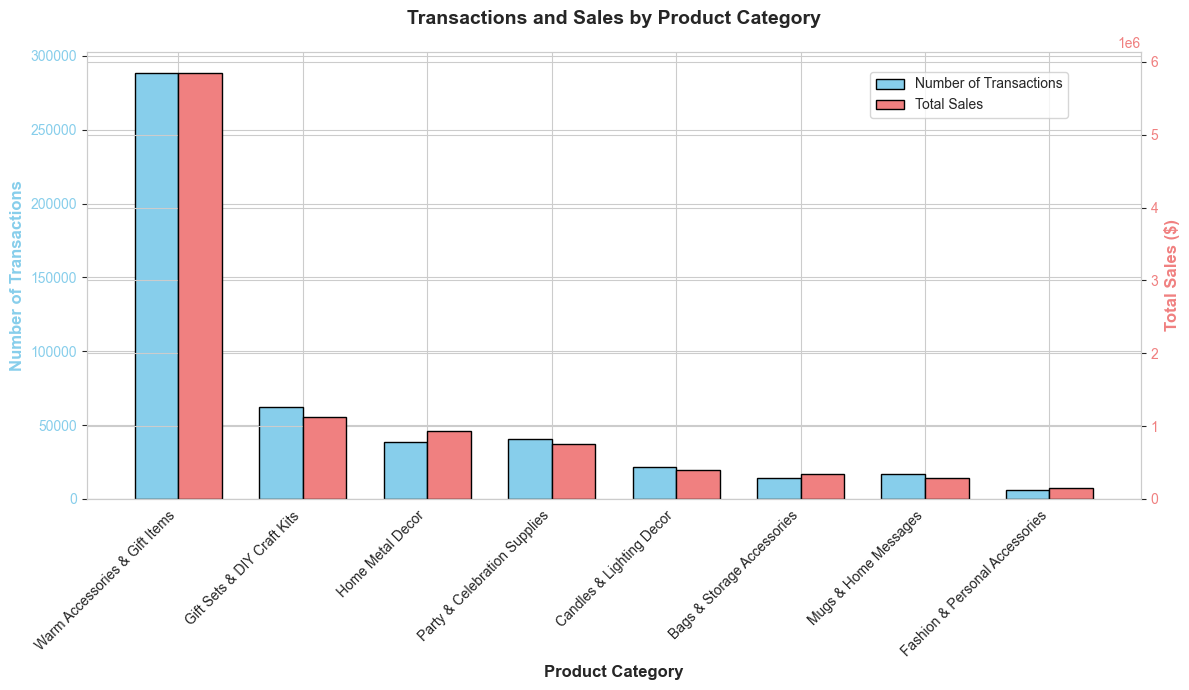

In [12]:
fig, ax1 = plt.subplots(figsize=(12, 7))

x = range(len(df_slice))
width = 0.35

ax1.bar([i - width/2 for i in x], df_slice['NumberOfTransactions'], 
        width, label='Number of Transactions', color='skyblue', edgecolor='black')
ax1.set_xlabel('Product Category', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Transactions', fontsize=12, fontweight='bold', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

ax2 = ax1.twinx()
ax2.bar([i + width/2 for i in x], df_slice['TotalSales'], 
        width, label='Total Sales', color='lightcoral', edgecolor='black')
ax2.set_ylabel('Total Sales ($)', fontsize=12, fontweight='bold', color='lightcoral')
ax2.tick_params(axis='y', labelcolor='lightcoral')

plt.title('Transactions and Sales by Product Category', fontsize=14, fontweight='bold', pad=20)
ax1.set_xticks(x)
ax1.set_xticklabels(df_slice['ProductCategory'], rotation=45, ha='right')

fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))
fig.tight_layout()

plt.savefig('images/transactions_vs_sales.png', dpi=300, bbox_inches='tight')
print("Saved: images/transactions_vs_sales.png")
plt.show()

### Sales Distribution Heatmap


Saved: images/sales_heatmap.png


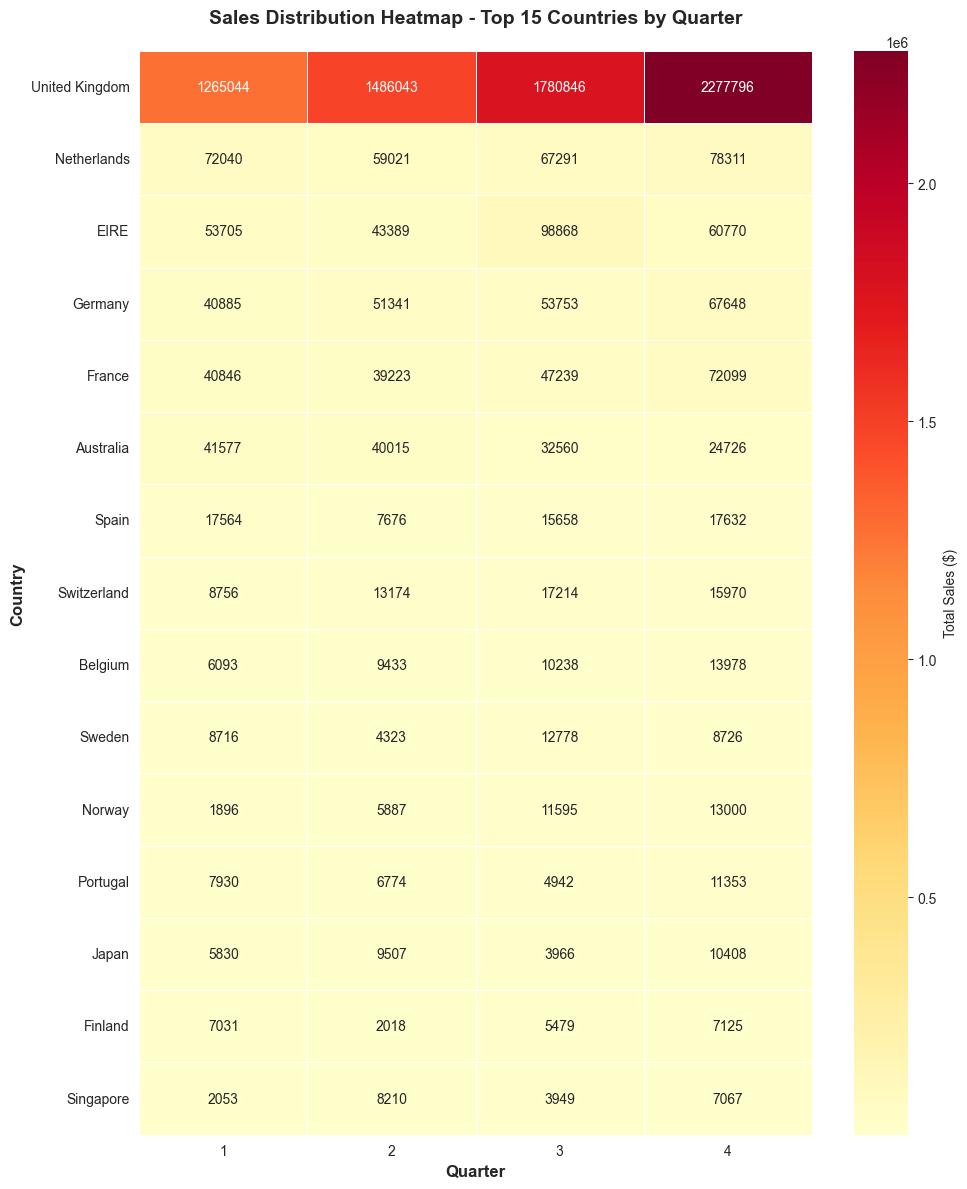

In [13]:
heatmap_data = df_rollup.pivot_table(
    values='TotalSales', 
    index='Country', 
    columns='Quarter', 
    aggfunc='sum',
    fill_value=0
)

top_15_countries = df_rollup.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(15).index
heatmap_data = heatmap_data.loc[top_15_countries]

plt.figure(figsize=(10, 12))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlOrRd', 
            linewidths=0.5, cbar_kws={'label': 'Total Sales ($)'})

plt.title('Sales Distribution Heatmap - Top 15 Countries by Quarter', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Quarter', fontsize=12, fontweight='bold')
plt.ylabel('Country', fontsize=12, fontweight='bold')
plt.tight_layout()

plt.savefig('images/sales_heatmap.png', dpi=300, bbox_inches='tight')
print("Saved: images/sales_heatmap.png")
plt.show()

### Close Database Connection

In [14]:
conn.close()
print("Database connection closed")
print("\nAll visualizations saved in the images folder")

Database connection closed

All visualizations saved in the images folder
